Gavin Gunawardena \
INFS 770 \
Assignment 5 \
Dr. Liu \

**Note: Most code used here is copied or updated from Dr. Liu's socialnet_example.ipynb example.*


In [1]:
#Initial Setup and Importing of Libraries & Dataset
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault, get_backend, rcParamsOrig
%matplotlib inline
import community
import networkx as nx
# specify the file location
file_name = "Email-Enron.txt"

# read an edge list into a networkx graph
g = nx.read_edgelist(file_name, # file location
                     comments="#", # the character used to indicate the start of a comment
                     delimiter="\t", # the character that separates values in a line
                     create_using=nx.Graph() # create as undirected graph
                    )
print(g)

Graph with 36692 nodes and 183831 edges


In [2]:
#Task 1
#Print number of nodes and edges in the entire network
print(nx.info(g))
#Print density of the network
print("Network Density: %.8f" % nx.density(g))

Graph with 36692 nodes and 183831 edges
Network Density: 0.00027310


C:\Users\ggobl\AppData\Local\Temp\ipykernel_6796\1817697128.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(g))


#### Task 2: 1) What do the nodes and edges mean in this network? 2) Are the edges weighted? If so, what does the weight mean? 3) What does density of network mean? (you don’t need to write code for these questions) 

*1. Nodes represent people and edges represent connections between people.* \
*2. No* \
*3. It indicates the result of the calculation: Number of edges that are present divided by the amount of edges that could be present. Essentially it indicates how many connections between nodes are present compared to how many are possible within the network.*

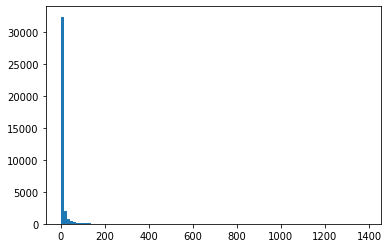

In [3]:
#Task 3
#Plot the degree histogram
degree = nx.degree(g)
plt.hist([y for (x, y) in degree], bins=100);

#### Task 3.1: Interpret the histogram
*This histogram indicates a power law distribution between degree for degree within this social network. This means that one or few nodes have a much higher degree, or sum of connections, compared to the other nodes. Also, this being a power law distribution, it has a high kurtosis and positive skewness which may indicate a hierarchy within the network.*

In [4]:
#Task 4
#Print the number of connected components in the network.
components = list(nx.connected_components(g))
print("number of component:", len(components))
df_comp = pd.DataFrame()

#Print the number of nodes and number of edges in the largest component.
df_comp["n_nodes"] = [len(c) for c in components]
print("number of nodes in largest component:", df_comp["n_nodes"].max())
for c in components:
    if len(c) == df_comp["n_nodes"].max():
        comp_largest = g.subgraph(c)
print("number of edges in largest component:", len(comp_largest.edges()))

number of component: 1065
number of nodes in largest component: 33696
number of edges in largest component: 180811


Component A:


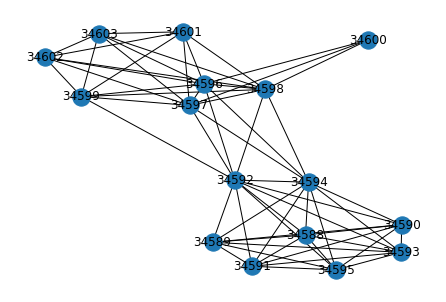

In [5]:
#Task 5
#Write code to name the component having 16 nodes as comp_A and the component having 14 nodes as comp_B. 
for c in components:
    if len(c) == 16:
        comp_A = g.subgraph(c)
    if len(c) == 14:
        comp_B = g.subgraph(c)
        
#Write code to visualize them
print("Component A:")
nx.draw_spring(comp_A, with_labels=True)

Component B:


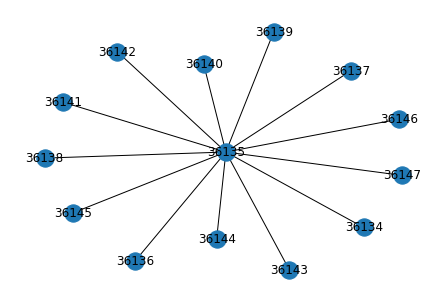

In [6]:
print("Component B:")
nx.draw_spring(comp_B, with_labels=True)

#### Task 6: Summarize the difference between comp_A and compB. You need to at least compare these two subgraphs with respect to average degree and density.
*Comparing components A and B, they're of course slightly different in size since A has 16 nodes as opposed to B's 14. From viewing them and actually obtaining their density values via the nx.density function, component B has a much smaller density due to all but one of the nodes only being connected to a single node as opposed to component A where every node has at least 3 connections with most having around 7. As for edges, component A has many more at 59 compared to component B's 13. Viewing degree visually and also via utilizing the nx.degree function, the nodes of component A have a much higher average degree than those of component B as only one of the nodes in component B has more than one connection.*

Number of commmunities:  2.0


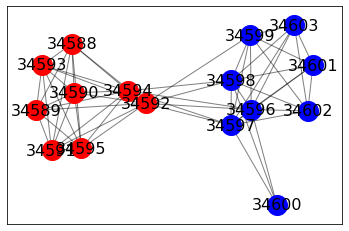

In [16]:
#Task 7: Please write code to use the Louvain modularity method to detect communities within Component A with 16 nodes. 
#Please visualize the different communities using different colors as I did in socialnet_example.ipynb. 
#Please write code to print the number of communities you discovered.  
partition = community.best_partition(comp_A)
#drawing
size = float(len(set(partition.values())))
print("Number of commmunities: ",size)
pos = nx.spring_layout(comp_A)
count = 0
colors = ["r", "b", "y"]
for com in set(partition.values()) :  
    list_nodes = [nodes for nodes in partition.keys()if partition[nodes] == com]
    nx.draw_networkx_nodes(g, pos, list_nodes, node_size = 400, node_color = colors[count])
    labels = {}    
    for node in list_nodes:
        #set the node name as the key and the label as its value 
        labels[node] = node # in our example, for each note (e.g, node "a"), we print the same lable (e.g., a)
    #Now only add labels to the nodes you require (the hubs in my case)
    nx.draw_networkx_labels(comp_A,pos,labels,font_size=16,font_color='k')
    count += 1
nx.draw_networkx_edges(comp_A, pos, alpha=0.5)
plt.show()
values = [(node, partition.get(node)) for node in g.nodes()]
#print(values)

In [72]:
#Task 8: Please write code to print the number of cliques in comp_A. Please write code to show the nodes in the largest clique.
clique_count = 0
max_val_ind = 0
largest_clique = list()
for cliq in nx.find_cliques(comp_A):
    clique_count += 1
    if len(cliq) > max_val_ind:
        max_val_ind = len(cliq)
        largest_clique = cliq
print("Number of cliques =", clique_count)
print("Largest clique:",largest_clique)



['34603', '34599', '34602', '34596', '34601', '34598', '34597']
['34592', '34599', '34596', '34598', '34597']
['34592', '34594', '34596', '34598', '34597']
['34592', '34594', '34593', '34588', '34590', '34589', '34595', '34591']
['34600', '34596', '34598', '34597']
Number of cliques = 5
Largest clique: ['34592', '34594', '34593', '34588', '34590', '34589', '34595', '34591']


Task 9:Please tell me in the textbox which two nodes (people) in comp_A are likely to have similar opinions and why, and 
    which two nodes in comp_A are likely to have different opinions and why.
    
*People who are likely to have similar opinions include those in the same clique who are connected to the same nodes as well as each other, and are not connected to nodes in another clique. An example of this would be nodes 34601 and 34603. Nodes 34589 and 34601 are likely to have different opinions since they're part of different communities and cliques, and they're not connected to any of the same nodes.*

In [79]:
#Task 10: Find important nodes in comp_A using at least three centrality 
#measures. For each measure, please write code to print a datafame with 
#two columns “node” and centrality (e.g., betweenness_centrality or 
#closeness_centrality) and the dataframe needs to be sorted by the 
#centrality measure in a descending order. 

#Betweenness Centrality
# compute node betweenness of a graph
between = nx.betweenness_centrality(comp_A)
# convert it to pandas dataframe
df_between = pd.DataFrame(list(between.items()), columns=["node", "betweenness_centrality"])
# sort nodes by betweenness in descending order
df_between = df_between.sort_values("betweenness_centrality", ascending=False)
print("Betweenness Centrality:")
display(df_between)

#Closenesss Centrality
# compute node closeness of a graph
closeness = nx.closeness_centrality(comp_A)

# convert it to pandas dataframe
df_closeness = pd.DataFrame(list(closeness.items()), columns=["node", "closeness_centrality"])

# sort nodes by closeness in descending order
df_closeness=df_closeness.sort_values("closeness_centrality", ascending=False)
print("Closeness Centrality:")
display(df_closeness)

#Eigenvector Centrality# compute node betweenness of a graph
# compute node eigenvector centrality of a graph
eigen = nx.eigenvector_centrality(comp_A)

# convert it to pandas dataframe
df_eigen = pd.DataFrame(list(eigen.items()), columns=["node", "eigenvector_centrality"])

# sort nodes by eivenvector centrality in descending order
df_eigen=df_eigen.sort_values("eigenvector_centrality", ascending=False)
print("Eigenvector Centrality:")
display(df_eigen)

Betweenness Centrality:


,node,betweenness_centrality
6,34592,0.271769
7,34594,0.187755
10,34596,0.106122
12,34597,0.106122
14,34598,0.106122
0,34599,0.031633
1,34603,0.000000
2,34602,0.000000
3,34593,0.000000
4,34588,0.000000


Closeness Centrality:


,node,closeness_centrality
6,34592,0.789474
7,34594,0.750000
10,34596,0.714286
12,34597,0.714286
14,34598,0.714286
0,34599,0.652174
3,34593,0.555556
4,34588,0.555556
5,34590,0.555556
8,34595,0.555556


Eigenvector Centrality:


,node,eigenvector_centrality
6,34592,0.368005
7,34594,0.343403
10,34596,0.267535
12,34597,0.267535
14,34598,0.267535
3,34593,0.252391
4,34588,0.252391
5,34590,0.252391
8,34595,0.252391
9,34591,0.252391


Task 11: Summarize the results you obtained from the different centrality measures.

*The top 5 nodes of each measure give similar results showing their importance in this social network. These results show how this reoccurring group of 5 people in the 3 dataframes appear the most frequently when checking what nodes appear in the shortest paths between other non-adjacent nodes, illustrating a high betweenness centrality of this group of 5 people. This reoccurring group of 5 people illustrates a high closeness centrality due to having the lowest geodesic distances, or shortest paths, to all other nodes in the social network. A high eigenvector centrality is also represented by the beforementioned group of 5 nodes in the social network due to their high importance within the network based on an eigenvector and adjacency matrix based algorithm. With eigenvector centrality, each node is assigned a score which is positively influenced by the scores of connected nodes and that indicates relative importance within the network.*